
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (`Data2.csv` з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори `x_data` та відгуки `y_data`. Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть $R^2$ на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть $R^2$ цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть $R^2$.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


Завантажую бібліотеки

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

from termcolor import colored
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import seaborn as sns

Зчитую дані з файлу у датафрейм


In [2]:
df = pd.read_csv("../Data2-clean.csv", sep=';' ,encoding='cp1252')
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0,17.048902
3,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0,164.427660
4,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0,23.111786
...,...,...,...,...,...,...,...
178,Vanuatu,East Asia & Pacific,2860.566475,270402.0,154.014,12190.0,22.182281
179,Vietnam,East Asia & Pacific,2170.648054,92701100.0,166910.839,330967.0,280.091671
180,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0,52.245796
181,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0,22.045136


Буду використовувати тільки числові дані


In [3]:
df=df._get_numeric_data()
df

,GDP per capita,Population,CO2 emission,Area,Population density
0,561.778746,34656032.0,9809.225,652860.0,53.083405
1,4124.982390,2876101.0,5716.853,28750.0,100.038296
2,3916.881571,40606052.0,145400.217,2381740.0,17.048902
3,36988.622030,77281.0,462.042,470.0,164.427660
4,3308.700233,28813463.0,34763.160,1246700.0,23.111786
...,...,...,...,...,...
178,2860.566475,270402.0,154.014,12190.0,22.182281
179,2170.648054,92701100.0,166910.839,330967.0,280.091671
180,990.334774,27584213.0,22698.730,527970.0,52.245796
181,1269.573537,16591390.0,4503.076,752610.0,22.045136


Записую дані у два датафрейми: предиктори `x_data` та відгуки `y_data`.


In [4]:
y_data = df[['CO2 emission']]
x_data = df[['Population', 'Area']]

Випадковим чином розділяю дані на навчальні та тестові (40% загального набору в якості тестових даних).


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)

print(f"Test amount: {colored(x_test.shape[0], 'white')}")
print(f"Train amount: {colored(x_train.shape[0], 'white')}")

Test amount: 37
Train amount: 146


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


З попередніх робіт знаю, що хорошими показниками для `CO2 emission` можуть бути:
- `Area`
- `Population`

При цьому одномірна модель для ознаки `Population` була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

Створюю об’єкт лінійної регресії та навчаю модель


In [6]:
linear_model=LinearRegression()
linear_model.fit(x_train[['Population']], y_train)

LinearRegression()

Обчислюю R^2  на навчальних та тестових даних:


In [7]:
y_train_pred = linear_model.predict(x_train[['Population']])
y_test_pred = linear_model.predict(x_test[['Population']])
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test data r2 score: {colored(r2_test, 'red' if r2_test < 0 else 'yellow' if r2_test <= 0.5 else 'green')}")
print(f"Train data r2 score: {colored(r2_train, 'red' if r2_train < 0 else 'yellow' if r2_train <= 0.5 else 'green')}")

Test data r2 score: 0.5480563564285827
Train data r2 score: 0.3374274053182892


Вони різні, бо на навчальних даних модель працює вперше, а на тестових уже має досвід. Тому оцінка $R^2$ на тестовому наборі даних вище. 

При виборі моделі треба орієнтуватись на результати тестових даних, оскільки вони показують як модель працює з новими даними

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю $R^2$


In [8]:
# Виконую поліноміальне перетворення 2 ступеня для ознаки `Populaion`
f2 = np.polyfit(x_train['Population'], y_train['CO2 emission'], 2)

# Будую поліноміальну модель
p2 = np.poly1d(f2)

# На тестових даних обчислюю R^2
r2_2 = r2_score(y_test, p2(x_test[['Population']]))

print(f"Test data r2 score (degree=2): {colored(r2_2, 'red' if r2_2 < 0 else 'yellow' if r2_2 <= 0.5 else 'green')}")

Test data r2 score (degree=2): 0.32633914104411854


Будую поліноміальну модель 3 ступеня, на тестових даних обчислюю $R^2$


In [9]:
# Виконую поліноміальне перетворення 2 ступеня для ознаки `Populaion`
f3 = np.polyfit(x_train['Population'], y_train['CO2 emission'], 3)

# Будую поліноміальну модель
p3 = np.poly1d(f3)

# На тестових даних обчислюю R^2
r2_3 = r2_score(y_test, p3(x_test[['Population']]))

print(f"Test data r2 score (degree=3): {colored(r2_3, 'red' if r2_3 < 0 else 'yellow' if r2_3 <= 0.5 else 'green')}")

Test data r2 score (degree=3): -0.2860655741824327


Будую поліноміальну модель 4 ступеня, на тестових даних обчислюю $R^2$


In [10]:
# Виконую поліноміальне перетворення 2 ступеня для ознаки `Populaion`
f4 = np.polyfit(x_train['Population'], y_train['CO2 emission'], 4)

# Будую поліноміальну модель
p4 = np.poly1d(f4)

# На тестових даних обчислюю R^2
r2_4 = r2_score(y_test, p4(x_test[['Population']]))

print(f"Test data r2 score (degree=4): {colored(r2_4, 'red' if r2_4 < 0 else 'yellow' if r2_4 <= 0.5 else 'green')}")

Test data r2 score (degree=4): -27.910616017722056


Візуалізую моделі (зручно розміщувати всі моделі на одному графіку для обрання найкращої) та показник їх якості (доцільно побудувати графік залежності $R^2$ або MSE від порядку поліному моделі)

Будую візуалізації моделей

Text(0, 0.5, 'CO2 emission')

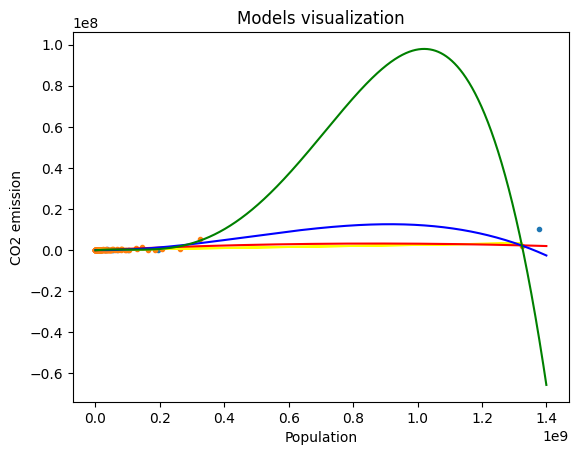

In [11]:
x_new = np.linspace(0, 1.4e+9, 10000)
plt.plot(x_test['Population'], y_test, '.')
plt.plot(x_train['Population'], y_train, '.')
plt.plot(x_train['Population'],  linear_model.predict(x_train[['Population']]), color='yellow')
plt.plot(x_new, p2(x_new), color='red')
plt.plot(x_new, p3(x_new), color='blue')
plt.plot(x_new, p4(x_new), color='green')

plt.title("Models visualization")
plt.xlabel('Population')
plt.ylabel("CO2 emission")

Будую візуалізацію залежності R^2 або MSE від порядку поліному моделі

Text(0, 0.5, 'r2 score')

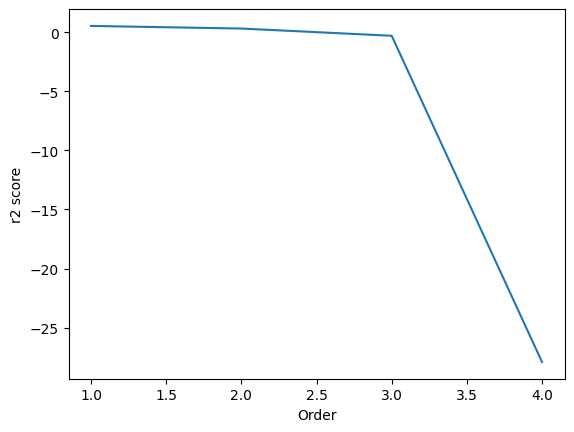

In [12]:
plt.plot([1, 2, 3, 4], [r2_test, r2_2, r2_3, r2_4], '-')
plt.xlabel('Order')
plt.ylabel('r2 score')

Найкращою є модель другого ступеня, бо для третього ступеня та далі спостерігається перенавчання.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю $R^2$


In [13]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [14]:
# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
ridge_model = Ridge(alpha=10)
ridge_model.fit(x_train_poly, y_train)

C:\Users\local_gud2i5y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.25694e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

In [15]:
# Зробимо передбачення та обчислимо R^2
y_train_pred = ridge_model.predict(x_train_poly)
y_test_pred = ridge_model.predict(x_test_poly)

# Обчислимо R^2 для тренувальних та тестових даних
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test ridge model r2 score: {colored(r2_test, 'red' if r2_test < 0 else 'yellow' if r2_test <= 0.5 else 'green')}")
print(f"Train ridge model r2 score: {colored(r2_train, 'red' if r2_train < 0 else 'yellow' if r2_train <= 0.5 else 'green')}")

Test ridge model r2 score: 0.7946626689998828
Train ridge model r2 score: 0.8058007139342835


<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


Створюю словник значень параметрів:


In [16]:
params = {'alpha': [0, 0.1, 1, 10, 100, 10e5, 10e7]}

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [17]:
RR=Ridge()
Grid_1 = GridSearchCV(RR, params, cv=4)
Grid_1

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 1, 10, 100, 1000000.0, 100000000.0]})

Підбираю модель:


In [18]:
Grid_1.fit(x_data[['Population', 'Area']], y_data[['CO2 emission']])
Grid_1

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0, 0.1, 1, 10, 100, 1000000.0, 100000000.0]})

Отримую модель з найкращими параметрами:


In [19]:
Best_RR = Grid_1.best_estimator_
Best_RR

Ridge(alpha=100000000.0)

Тестую модель на тестових даних (обчислюю $R^2$):


In [20]:
y_train_pred = Best_RR.predict(x_train)
y_test_pred = Best_RR.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train ridge model r2 score: {colored(r2_train, 'red' if r2_train < 0 else 'yellow' if r2_train <= 0.5 else 'green')}")
print(f"Test ridge model r2 score: {colored(r2_test, 'red' if r2_test < 0 else 'yellow' if r2_test <= 0.5 else 'green')}")

Train ridge model r2 score: 0.28342449869312825
Test ridge model r2 score: 0.8633877202497476


<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих), всі розмістіть на одній координатній сітці для зручного порівняння.</p>
</div>


Використаю метод `predict`, щоб спрогнозувати результати, а потім скористаюсь функцією `DistributionPlot`, щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.

In [21]:
def DistributionPlot(y_true, y_pred_linear, y_pred_poly, y_pred_ridge):
    plt.figure(figsize=(14, 8))
    sns.kdeplot(y_true.squeeze(), label='Actual', color='blue')
    sns.kdeplot(y_pred_linear.squeeze(), alpha=0.5, label='Linear Predicted', color='red')
    sns.kdeplot(y_pred_poly.squeeze(), alpha=0.5, label='Polynomial Predicted', color='green')
    sns.kdeplot(y_pred_ridge.squeeze(), alpha=0.5, label='Ridge Predicted', color='purple')

    plt.xlabel('CO2 emission')
    plt.ylabel('Frequency')
    plt.title('Distribution of Actual vs Predicted CO2 Emissions')
    plt.legend(loc='upper right')
    plt.show()

In [22]:
# Linear regression
y_pred_linear = linear_model.predict(x_test[['Population']])

# Polynomial regression (degree=2)
y_pred_poly = p2(x_test['Population'])

# Ridge regression
y_pred_ridge = Best_RR.predict(x_test)

# Calculating R^2
r2_linear = r2_score(y_test, y_pred_linear)
r2_poly = r2_score(y_test, y_pred_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)

Побудова графіків для кожної моделі

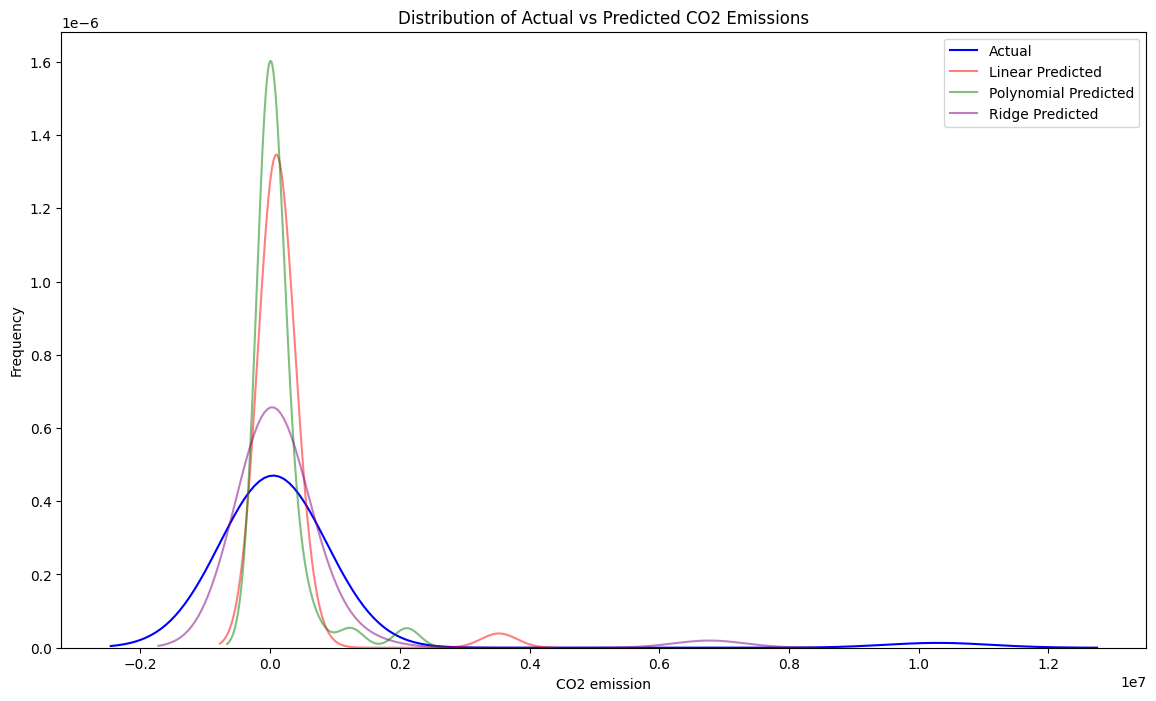

In [23]:
DistributionPlot(y_test, y_pred_linear, y_pred_poly, y_pred_ridge)

Виведення значень $R^2$

In [24]:
print(f"Test linear model r2 score: {colored(r2_linear, 'red' if r2_linear < 0 else 'yellow' if r2_linear <= 0.5 else 'green')}")
print(f"Test polynomial model r2 score: {colored(r2_poly, 'red' if r2_poly < 0 else 'yellow' if r2_poly <= 0.5 else 'green')}")
print(f"Test ridge model r2 score: {colored(r2_ridge, 'red' if r2_ridge < 0 else 'yellow' if r2_ridge <= 0.5 else 'green')}")

Test linear model r2 score: 0.5480563564285827
Test polynomial model r2 score: 0.32633914104411854
Test ridge model r2 score: 0.8633877202497476


#### Висновок

Порівнюючи всі моделі, роблю висновок, що **модель Ridge regression (гребенева регресія) є найкращою моделлю** для прогнозування `CO2 emission` на основі нашого набору даних.

## Виконав студент групи ІП-24
## **Піддубний Борис**